# NYC Property Sales

A year's worth of properties sold on the NYC real estate market.

From https://www.kaggle.com/new-york-city/nyc-property-sales

_Inspiration_   

What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market, or build a model that predicts sale value in the future?

_Step 1 Look at and understand the data_  

We may have many questions about these data but the first step in statistical learning is exploratory data analysis (EDA). 

## Dataset Description

Properties sold in New York City over a 12-month period from September 2016 to September 2017.

### Context
This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

### Content
This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).  

BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. 




In [ ]:
# import libraries
'''
It is good to stick to convention unless there is a good reason to break it
a statement like
import pandas as pandybear
will cause issues
'''
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.cbook

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  if __name__ == '__main__':


To use H2O.ai we need to

1. Install Java
2. Install H2O
3. Import H2O


In [ ]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
openjdk version "11.0.8" 2020-07-14
OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)


In [ ]:
! pip install h2o

     |████████████████████████████████| 129.4MB 69kB/s 
  Created wheel for h2o: filename=h2o-3.30.1.2-py2.py3-none-any.whl size=129446949 sha256=7f674ab128c49a4b9424167feff32523e9c063f4f0a78543b0a6c619fa90b2ee
  Stored in directory: /root/.cache/pip/wheels/c6/be/83/a33a3c1c97fce1d136222bf4ed6d79da405ef6103f5b434c1e
Successfully built h2o


In [ ]:
# Disable the limit of columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = pd.read_csv("https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/data/nyc-rolling-sales.csv")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


## Build a data dictionary

Many of these fields are fairly obvious from their names. ADDRESS, ZIP CODE, etc.  Others are less so. BUILDING CLASS AT PRESENT - what does that mean? TAX CLASS AT PRESENT C2 - what does that mean?

Note that the sale price (which is probably in US dollars) is based on a sale date.  If one were trying to build a statistical model to predict price this could be an issue.  An apartment last sold in 1900 would reflect a very undervalued price.

*Class Discussion*

How would you address the undervalued price issue? Write up your thoughts in the class notes. Your class notes must be uploaded by 11:59PM the day of the lecture. Class notes are 5 points every lecture.

In [ ]:
# Descriptive statistics
df.describe()


,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


## Descriptive statistics

Do the descriptive statistics make sense?  What does it mean to have zero residential units? Does it mean that the property has commercial units? 

The average year that houses were built is 537. Are houses in NYC really that old?  How can we correct that? 

*Class Discussion*

Find something odd about the descriptive statistics. Is it an issue for analysis. How would you deal with it?  Write up your thoughts in the class notes.


In [ ]:
# What does this tell you? Why isn't it df.shape()?
print(df.shape)

(84548, 22)


In [ ]:
# Find missing values. What does this tell you?
missing_values_count = df.isnull().sum()
missing_values_count

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [ ]:
# Find zero values. What does this tell you? Does this make sense?
zero_values_count = df.isin([0]).sum()
zero_values_count

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                            982
RESIDENTIAL UNITS                 24783
COMMERCIAL UNITS                  79429
TOTAL UNITS                       19762
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [ ]:
# What does this do? Explain in your notes.
for column in df.columns:
    if df[column].dtype != 'int64':
        df[column].str.strip()

## Zero values

*Class Discussion*

Are all of these zero values appropriate? Is it an issue for analysis? How would you deal with it?  Write up your thoughts in the class notes.


In [ ]:
# Is there a difference between these two python statements? Is one preferable?
df_tmp1=df
df_tmp2=df.copy()

In [ ]:
# What do these statements do? Why would one do them?
df_tmp2[['SALE PRICE']]=df_tmp2[['SALE PRICE']].replace(0, df_tmp2[['SALE PRICE']].median())
df_tmp2[['YEAR BUILT']]=df_tmp2[['YEAR BUILT']].replace(0, np.nan)

## Changing data types

*Class Discussion*

Would you change any data types? Which ones and why? Write up your thoughts in the class notes.

In [ ]:
# What does this do? Explain in your notes.
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['TOTAL UNITS'] = pd.to_numeric(df['TOTAL UNITS'], errors='coerce')
df['BOROUGH'] = df['BOROUGH'].astype('category')
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].astype('category')

In [ ]:
# Look at the SALE PRICE columns
missing_values_count = df.isnull().sum()
missing_values_count

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [ ]:
 df['SALE PRICE'].head()

0    6625000.0
1          NaN
2          NaN
3    3936272.0
4    8000000.0
Name: SALE PRICE, dtype: float64

In [ ]:
# What does this do? Explain in your notes.
df[['SALE PRICE']]=df[['SALE PRICE']].replace(np.nan, df[['SALE PRICE']].median())

In [ ]:
 df['SALE PRICE'].head()

0    6625000.0
1     530000.0
2     530000.0
3    3936272.0
4    8000000.0
Name: SALE PRICE, dtype: float64

In [ ]:
 df['SALE PRICE'].describe()

count    8.454800e+04
mean     1.147900e+06
std      1.038058e+07
min      0.000000e+00
25%      3.000000e+05
50%      5.300000e+05
75%      8.300000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [ ]:
# Find zero values. What does this tell you? Does this make sense?
zero_values_count = df.isin([0]).sum()
zero_values_count

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                            982
RESIDENTIAL UNITS                 24783
COMMERCIAL UNITS                  79429
TOTAL UNITS                       19762
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        10228
SALE DATE                             0
dtype: int64

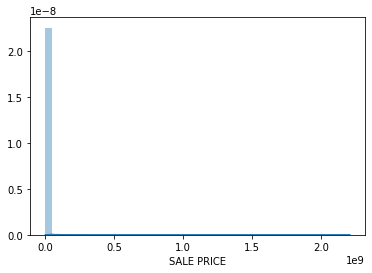

In [ ]:
# What does this tell you?
sns.distplot(df['SALE PRICE'])

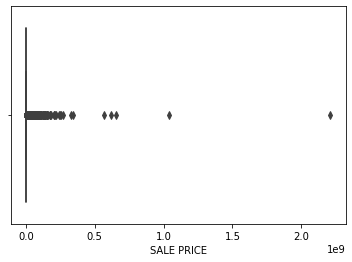

In [ ]:
# What does this tell you?
sns.boxplot(x='SALE PRICE', data=df)

## Where did all of the SALE PRICE zeros come from?

*Class Discussion*

Where did all of the SALE PRICE zeros come from? Write up your thoughts in the class notes.

## Replacing values

*Class Discussion*

Why did SALE PRICE go from zero nan to 14561 nan after converting to numeric?  

Would you replace any values? Which ones and why? Write up your thoughts in the class notes.

In [ ]:
# What does this do? Explain in your notes.
del df['EASE-MENT']

In [ ]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,530000.0,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,530000.0,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [ ]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Unnamed: 0                      84548 non-null  int64   
 1   BOROUGH                         84548 non-null  category
 2   NEIGHBORHOOD                    84548 non-null  category
 3   BUILDING CLASS CATEGORY         84548 non-null  object  
 4   TAX CLASS AT PRESENT            84548 non-null  object  
 5   BLOCK                           84548 non-null  int64   
 6   LOT                             84548 non-null  int64   
 7   BUILDING CLASS AT PRESENT       84548 non-null  object  
 8   ADDRESS                         84548 non-null  object  
 9   APARTMENT NUMBER                84548 non-null  object  
 10  ZIP CODE                        84548 non-null  int64   
 11  RESIDENTIAL UNITS               84548 non-null  int64   
 12  COMMERCIAL UNITS  

## Skewness discussion

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

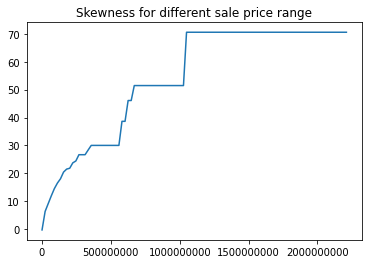

In [ ]:
# What does this tell you?
x = np.linspace(9.500000e+05,2.210000e+09, num=100)

y = [df[(df['SALE PRICE'] < x_range)]['SALE PRICE'].skew() for x_range in x]
sns.lineplot(x=x,y=y)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Skewness for different sale price range')
plt.show()

## Skewness discussion

*Class Discussion*

What does the skewness graph tell you? Write up your thoughts in the class notes.

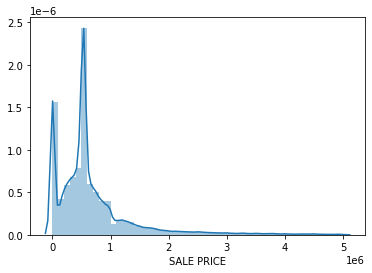

In [ ]:
# What does this tell you?
sns.distplot(df[(df['SALE PRICE'] < 5e+06)]['SALE PRICE'])

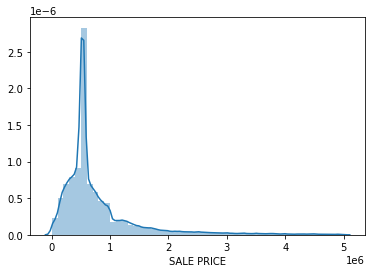

In [ ]:
sns.distplot(df[(df['SALE PRICE'] > 1e+03) & (df['SALE PRICE'] < 5e+06)]['SALE PRICE'])

## Distribution
Class Discussion

What does the distribution graph tell you? Write up your thoughts in the class notes.

## Feature Selection

What features are related to the target (dependent variable) SALE PRICE   



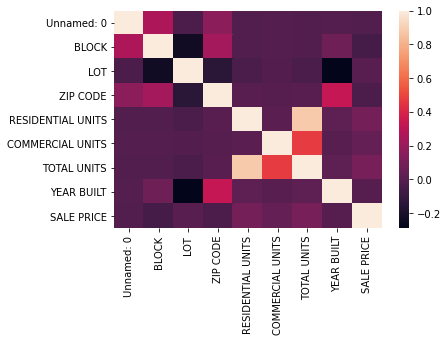

In [ ]:
#Correlation between the features
corr = df.corr()
sns.heatmap(corr)

In [ ]:
#Let's sort the numeric correlation between sale price and other features
corr['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
TOTAL UNITS          0.103112
RESIDENTIAL UNITS    0.094278
COMMERCIAL UNITS     0.043670
LOT                  0.010957
YEAR BUILT          -0.002009
Unnamed: 0          -0.015184
ZIP CODE            -0.029975
BLOCK               -0.054124
Name: SALE PRICE, dtype: float64

## Feature Selection Discussion
*Class Discussion*

Is there any significant correlation?

What about categorical variables? Can they be related to the target (dependent variable) SALE PRICE?

What other methods can be used for feature selection? Write up your thoughts in the class notes.

47


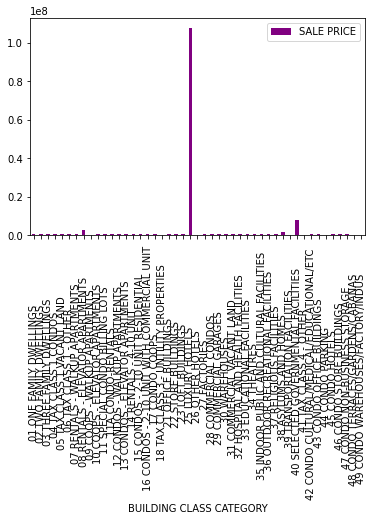

In [ ]:
# What does this tell you?
print(df['BUILDING CLASS CATEGORY'].nunique())
pivot=df.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.median)
pivot
pivot.plot(kind='bar', color='Purple')

## A simple analysis



In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Unnamed: 0                      84548 non-null  int64   
 1   BOROUGH                         84548 non-null  category
 2   NEIGHBORHOOD                    84548 non-null  category
 3   BUILDING CLASS CATEGORY         84548 non-null  object  
 4   TAX CLASS AT PRESENT            84548 non-null  object  
 5   BLOCK                           84548 non-null  int64   
 6   LOT                             84548 non-null  int64   
 7   BUILDING CLASS AT PRESENT       84548 non-null  object  
 8   ADDRESS                         84548 non-null  object  
 9   APARTMENT NUMBER                84548 non-null  object  
 10  ZIP CODE                        84548 non-null  int64   
 11  RESIDENTIAL UNITS               84548 non-null  int64   
 12  COMMERCIAL UNITS  

In [ ]:
# X and y is a common convention for the independent and dependent variables
y='SALE PRICE'
X=['BOROUGH', 'NEIGHBORHOOD', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'TAX CLASS AT TIME OF SALE','SALE PRICE']
Xy=['BOROUGH', 'NEIGHBORHOOD', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'TAX CLASS AT TIME OF SALE','SALE PRICE']

In [ ]:
df=df[Xy]
df.head()

,BOROUGH,NEIGHBORHOOD,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,5,0,5,2,6625000.0
1,1,ALPHABET CITY,28,3,31,2,530000.0
2,1,ALPHABET CITY,16,1,17,2,530000.0
3,1,ALPHABET CITY,10,0,10,2,3936272.0
4,1,ALPHABET CITY,6,0,6,2,8000000.0


## Statistcial learning with an ensemble of machine learning algorithms

_Lessons from Kaggle – Ensemble ML and Feature Engineering_

99.9% of high ranking Kaggle submissions shared two approaches. Stacking and feature engineering. In this notebook, we will use indivdual models and stacked models to predict lift. Stacking is a type of ensemble, creating a ”super-model” by combining many complementary models.

We will generate thousands of individual models, select the best models and combine the best models into a ”super-model” to predict lift.

_Models and hyperparamter optimization_

A model is an algorithm with a given set of hyperparamters. For example, a random forest estimator that uses 10 trees and one that uses 20 trees are two different models. Using a few algorithms and important tuning paramters (hyperparamters) we will try many combination and select rank the models on some metric like AUC, mean residual deviance, RSME as approriate for the analysis.  

_The machine learning algorithms_

We will use the following algorithms as our base:

* Deep Learning (Neural Networks)    
* Generalized Linear Model (GLM)  
* Extreme Random Forest (XRT) 
* Distributed Random Forest (DRF)     
* Gradient Boosting Machine (GBM)     
* XGBoost   


_Deep Learning (Neural Networks)_  

The are simple Multi-Layer Perceptrons (MLPs) as discussed in the first notebook.  


_Generalized Linear Model (GLM)_   

The generalized linear model (GLM) is a flexible generalization of ordinary linear regression that allows for response variables that have error distribution models other than a normal distribution. The GLM generalizes linear regression by allowing the linear model to be related to the response variable via a link function and by allowing the magnitude of the variance of each measurement to be a function of its predicted value.

In our case, we will assume that the the distribution of errors is normal and that the link function is the identity, which means the we will be performing simple linear regression.   Linear regression predicts the response variable $y$ assuming it has a linear relationship with predictor variable(s) $x$ or $x_1, x_2, ,,, x_n$.

$$y = \beta_0 + \beta_1 x + \varepsilon .$$


_Distributed Random Forest (DRF)_    

A Distributed Random Forest (DRF) is a powerful low-bias classification and regression tool that can fit highly non-linear data. To prevent overfitting a DRF generates a forest of classification or regression trees, rather than a single classification or regression tree through a process called bagging. The variance of estimates can be adjusted by the number of trees used. 

_Extreme Random Forest (XRT)_

Extreme random forests are nearly identical to standard random forests except that the splits, both attribute and cut-point, are chosen totally or partially at random. Bias/variance analysis has shown that XRTs work by decreasing variance while at the same time increasing bias. Once the randomization level is properly adjusted, the variance almost vanishes while bias only slightly increases with respect to standard trees. 


_Gradient Boosting Machine (GBM)_   

Gradient Boosting Machine (for Regression and Classification) is a forward learning ensemble method. The guiding heuristic is that good predictive results can be obtained through increasingly refined approximations. Boosting can create more accurate models than bagging but doesn’t help to avoid overfitting as much as bagging does.

Unlike a DRF which uses bagging to prevent overfitting, a GBM uses boosting to sequentially refine a regression or classification tree. However, as each tree is built in parallel it allows for multi-threading (asynchronous) training large data sets.

As with all tree based methods it creates decision trees and is highly interpretable.


_XGBoost_

XGBoost is a supervised learning algorithm that implements a process called boosting to yield accurate models. Boosting refers to the ensemble learning technique of building many models sequentially, with each new model attempting to correct for the deficiencies in the previous model. 

Both XGBoost and GBM follows the principle of gradient boosting. However, XGBoost has a more regularized model formalization to control overfitting. Boosting does not prevent overfitting the way bagging does, but typically gives better accuracy. XGBoost corrects for the deficiencies of boosting by ensembling regularized trees.

Like a GBM, each tree is built in parallel it allows for multi-threading (asynchronous) training large data sets.

As with all tree based methods it creates decision trees and is highly interpretable.

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
# Start H2O server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvv6os38q
  JVM stdout: /tmp/tmpvv6os38q/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvv6os38q/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.2
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_wehljk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
# conversion of pandas dataframe to h2o frame
hf = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
hf.head()

BOROUGH,NEIGHBORHOOD,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,TAX CLASS AT TIME OF SALE,SALE PRICE
1,ALPHABET CITY,5,0,5,2,6.625e+06
1,ALPHABET CITY,28,3,31,2,530000
1,ALPHABET CITY,16,1,17,2,530000
1,ALPHABET CITY,10,0,10,2,3.93627e+06
1,ALPHABET CITY,6,0,6,2,8e+06
1,ALPHABET CITY,20,0,20,2,530000
1,ALPHABET CITY,8,0,8,2,3.19284e+06
1,ALPHABET CITY,44,2,46,2,530000
1,ALPHABET CITY,15,0,15,2,530000
1,ALPHABET CITY,24,0,24,2,1.6232e+07


In [ ]:
# What does this do?
pct_rows=0.80
hf_train, hf_test = hf.split_frame([pct_rows])
print(hf_train.shape)
print(hf_test.shape)

(67627, 7)
(16921, 7)


## Test-train split versus cross validation

Why would one want to take a test-train split? How does this relate to cross validation?


In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=333)

In [ ]:
aml.train(x=X,y=y,training_frame=hf_train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XGBoost_grid__1_AutoML_20200907_175812_model_3,1.22086e+14,1.10493e+07,1.22086e+14,917250,nan
GBM_grid__1_AutoML_20200907_175812_model_2,1.22569e+14,1.10711e+07,1.22569e+14,1.01855e+06,nan
GBM_grid__1_AutoML_20200907_175812_model_1,1.22586e+14,1.10718e+07,1.22586e+14,1.02945e+06,nan
GBM_grid__1_AutoML_20200907_175812_model_3,1.23695e+14,1.11218e+07,1.23695e+14,1.02343e+06,nan
GBM_3_AutoML_20200907_175812,1.23961e+14,1.11338e+07,1.23961e+14,1.01756e+06,nan
GBM_5_AutoML_20200907_175812,1.24152e+14,1.11423e+07,1.24152e+14,1.03101e+06,5.01339
StackedEnsemble_BestOfFamily_AutoML_20200907_175812,1.24295e+14,1.11488e+07,1.24295e+14,1.07993e+06,nan
GBM_4_AutoML_20200907_175812,1.25446e+14,1.12003e+07,1.25446e+14,1.0243e+06,nan
GBM_2_AutoML_20200907_175812,1.26207e+14,1.12342e+07,1.26207e+14,1.02313e+06,nan
StackedEnsemble_AllModels_AutoML_20200907_175812,1.26535e+14,1.12488e+07,1.26535e+14,1.07479e+06,nan


*Class Discussion*

* What is the best metric to evaluate model performance?
* Which one would choose over the other - Mean Residual Deviance / RMSE/ MAE / RMSLE?

## RSME comparison and understanding the leader board

The best models after running for a little under 4 minutes is around 0.005 about half of that of the 0.010 RSME that we got our simple MLP in notebook one and a quarter of the  0.017 RSME that we got with a simple MLP with the same independent variables. 

When we run for a short time, under 10 minutes, our leaderboard will be biased towards tree-based methods as the deep learners take much more time to converge.  It is rare to see deep learners in the top 500 models when we run for less than 5 minutes.

We should still plot the results but before we do that let's discuss a big advantage of these models, model interpretability.


In [ ]:
# Get best GLM, GBM and XGBoost models
model_index=0
glm_index=0
glm_model=''
gbm_index=0
gbm_model=''
xgb_index=0
xgb_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1    

for m in aml_leaderboard_df['model_id']:
  if 'GBM' in m:
    models_dict[m]=gbm_index
    break  
  gbm_index=gbm_index+1   

for m in aml_leaderboard_df['model_id']:
  if 'XGB' in m:
    models_dict[m]=xgb_index
    break  
  xgb_index=xgb_index+1    
models_dict

{'GBM_grid__1_AutoML_20200907_175812_model_2': 1,
 'GLM_1_AutoML_20200907_175812': 13,
 'XGBoost_grid__1_AutoML_20200907_175812_model_3': 0}

## Examine the Best Model

In [ ]:
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])
best_model.algo

'xgboost'

## Variable importance plot

Variable importance plots in tree-based methods provides a list of the most significant variables in descending order by a measure of the information in each variable. Remember that tree calculates the information content of each variable. A variable importance plot is just a bar chart of each variables information content in decreasing order.

It can show actual information estimates or standardized plots like the one below. In a standardized plot the most important variable is always given a value of 1.0. The other variables scores represent their percentage of information relative to the most important variable.

Notice that some varibales have almost no information content. Knowing this allows for feature selection by removing unimportant variables. This makes a model more effecient to run and helps prevent overfitting as the unimportant variables can fit noise and, as we saw in notebook one, make strange predictions.

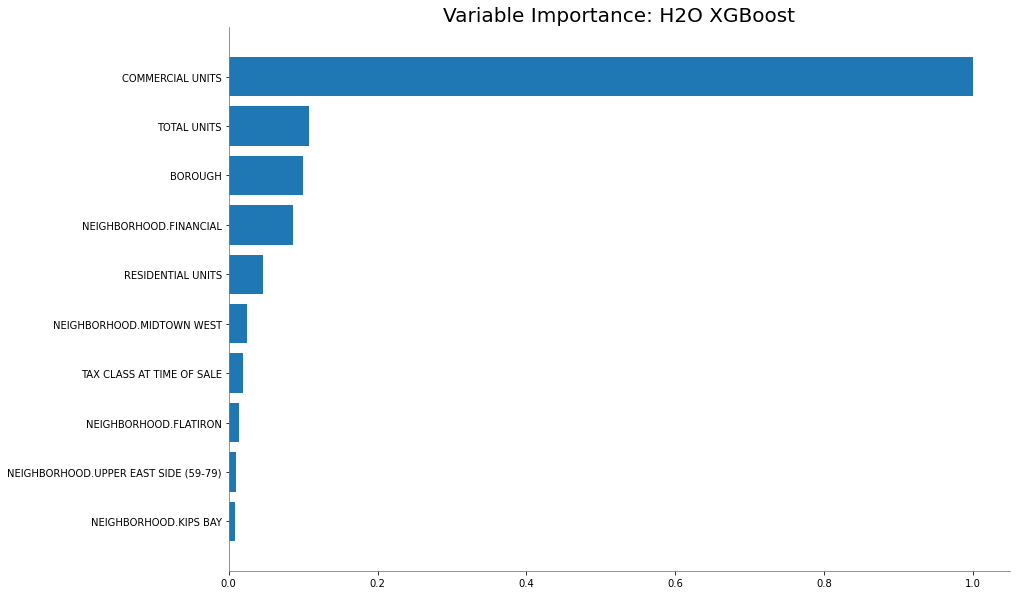

In [ ]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

13
glm


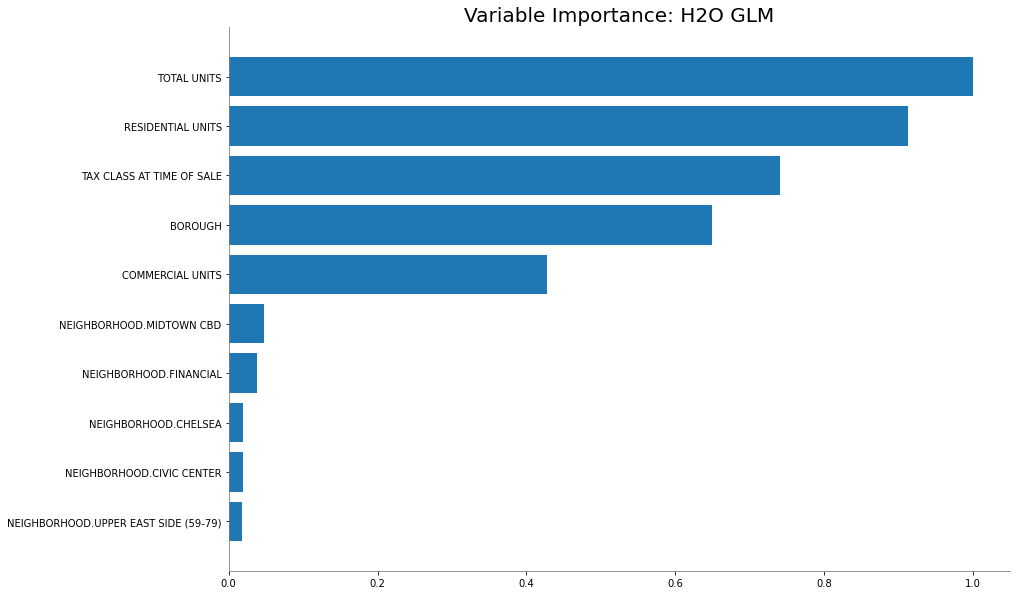

None


In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  print(glm_model.varimp_plot()) 

## Variable importance plot discussion

*Class Discussion*

* Which variables are important according to this plot?
* Did correlation or other analysis agree that the same variables are important? If not, why not? 
* What is the value along the X axis on the variable importance graph?
* How would you interpret the differentiation between the varaible importance results of GBM and GLM? How does it help you analyze it further?

Write up your thoughts in the class notes.

13
glm


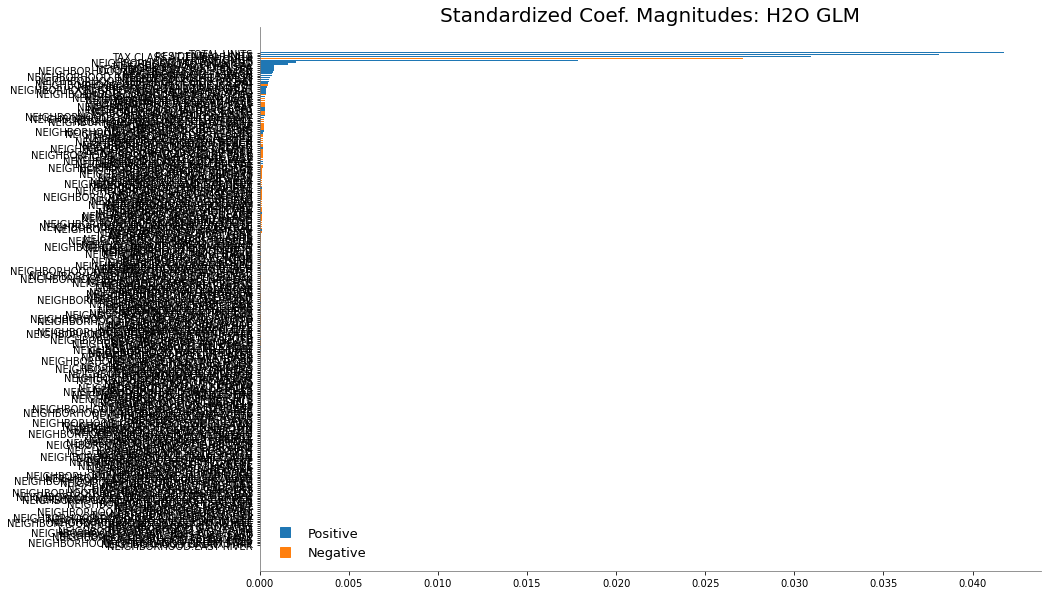

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo)
glm_model.std_coef_plot()

## GLM variable importance plot discussion
*Class Discussion* 

* Which variables are important according to the GLM variable importance plot? 
* Did correlation or other analysis agree that the same variables are important? If not, why not? 
* Can the GLM variable importance be negative? If so, why?  
* Did the GLM variable importance plot create more variables? If so, why? 

Write up your thoughts in the class notes.

In [ ]:
print(best_model.rmse(train = True))

10506790.048429245


In [ ]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [ ]:
mod_perf=best_model.model_performance(hf_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 66328596113242.68,
 'null_degrees_of_freedom': None,
 'null_deviance': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'rmse': 8144236.987787295}

In [ ]:
predictions = best_model.predict(hf_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
y_pred=h2o.as_list(predictions)
y_pred[0:5]

,predict
0,6.987658e+06
1,2.332610e+06
2,1.142344e+07
3,2.375344e+06
4,1.074246e+07


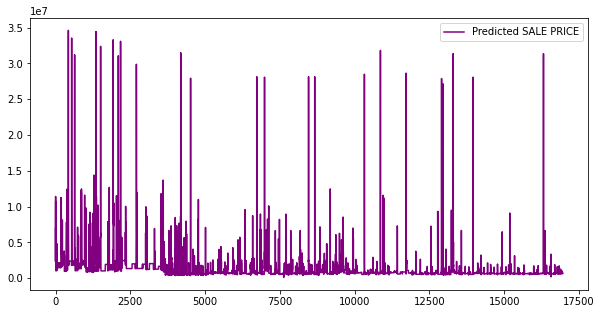

In [ ]:
df_test=hf_test.as_data_frame()
df_train=hf_train.as_data_frame()
plt.figure(figsize=(10,5))
plt.plot(y_pred, color='purple', label='Predicted SALE PRICE')
plt.legend()
plt.show()

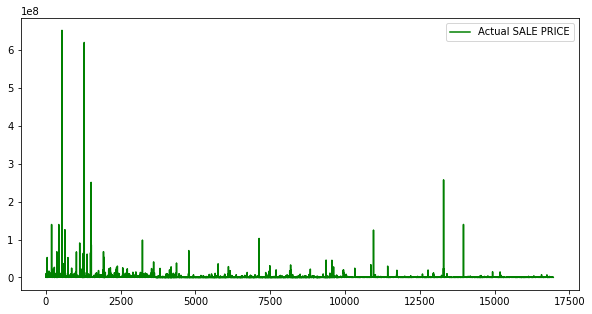

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_test['SALE PRICE'], color='g', label='Actual SALE PRICE')
plt.legend()
plt.show()

In [ ]:
y_train_mean=df_train['SALE PRICE'].mean()
print(y_train_mean)
print(best_model.rmse(train = True))

1141791.6748535242
10506790.048429245


## RSME discussion

Class Discussion

Did the model do well? One can think of the error as the mean (null model) plus/minus RSME or the mean (null model) plus/minus MAE. Is this good?

## To Do

1. Complete your class notes and upload them by 11:59PM the day of the lecture. (5 points) TAs will rate the notes on a scale of 0-5  

2. Weekly Quiz (25 points)
The weekly quiz is due 11:59PM the day before the first class of the next week.  

Q1 (5). Improve the error by at least 5% based on either RSME or MAE.  If your RSME is 100, then reducing it to 95 or less would be a 5% or more improvement.  

Q2 (5). Engineer a feature that improves the error by at least 5% based on either RSME or MAE. You must show that the improvement is due to the engineered feature.  

Q3 (10). Appropriately adjust the sale price such that it is adjusted for SALE DATE. How does this affect the models?  

Q4 (5). Explain how a stacked ensemble works.  




